Original images


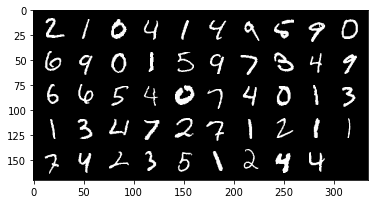

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Autoencoder reconstruction:


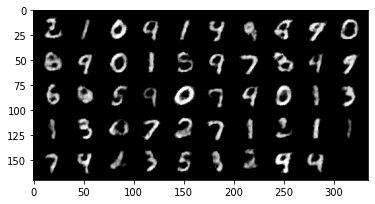

torch.Size([128, 10])
tensor([[  3.3761,   3.5185,   2.1542,  ...,  19.7016,   2.4463, -14.3871],
        [-19.3135,   5.9398, -11.1188,  ...,   8.0447,  11.4535,   6.6023],
        [ -7.1233,   6.3473,   1.9111,  ...,   3.8886,   0.5003,  -6.2390],
        ...,
        [  2.0486,   3.3717,   2.3037,  ...,   5.0099,  15.2813,  -7.8213],
        [ -6.1622, -15.2177, -15.9158,  ...,  21.1615,   7.4987,   1.5310],
        [ -6.2729,   6.0134,  13.5255,  ...,  18.5727,  10.0796, -12.1547]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [5]:
# %%
import torch
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torchvision.utils
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from main_clean import Autoencoder, visualise_output, show_image
import numpy as np
from architectures import Autoencoder, Encoder, Decoder


if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

batch_size = 128
mnist_val = dataset.MNIST(
    "./", train=False,
    transform=transforms.ToTensor(),
    download=True)

val_loader = torch.utils.data.DataLoader(
    dataset=mnist_val,
    batch_size=batch_size,
    shuffle=False)

# Define your model
latent_dim = 10
model = Autoencoder(latent_dim).to(device)

# Load the saved model
model.load_state_dict(torch.load(f'model_latent_dims_{latent_dim}.pt'))
model.eval()

images, labels = next(iter(val_loader))
images = images.to(device)
output = model(images)

model.eval()
show_image(torchvision.utils.make_grid(images[1:50], 10, 5), f"latent_dim_{latent_dim}.png", save=False)

visualise_output(images, model, device, f"img_latent_dim_{latent_dim}.png", save=False)

# %%

encoder = Encoder(latent_dim).to(device)
encoder.load_state_dict(torch.load(f'model_latent_dims_{latent_dim}.pt'))
encoder.eval()
# Obtain the hidden representation
hidden_representations = encoder(images)
print(hidden_representations.shape)
print(hidden_representations)




In [6]:
import matplotlib.pyplot as plt

# Create a list of 2D hidden representation
hidden_representations = hidden_representations.cpu().detach().numpy()
labels = labels.cpu().detach().numpy().tolist()

print(hidden_representations.shape)
print(labels)


(128, 10)
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5]


In [9]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(init='random', n_components=2, random_state=0, learning_rate=200) # enter init and lr to avoid warnings
hidden_representations_2d = tsne.fit_transform(hidden_representations)


tsne = TSNE(init='random', n_components=2, random_state=0, learning_rate=200)
hidden_representations_2d = tsne.fit_transform(hidden_representations)

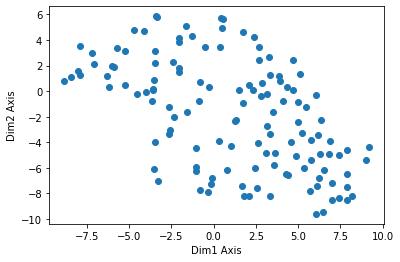

In [10]:
import matplotlib.pyplot as plt

# Plot the points using scatter plot
plt.scatter(*zip(*hidden_representations_2d))

# Label the axes
plt.xlabel('Dim1 Axis')
plt.ylabel('Dim2 Axis')

# Show the plot
plt.show()

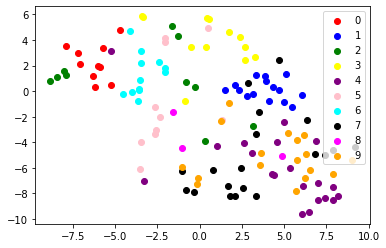

In [11]:
# Define colors for each label
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'cyan', 'black', 'magenta', 'orange']

# Plot the data points with different colors based on their labels
fig, ax = plt.subplots()
for label in np.unique(labels):
    mask = labels == label
    ax.scatter(hidden_representations_2d[mask, 0], hidden_representations_2d[mask, 1], c=colors[int(label)], label=str(label))

# Add a legend
ax.legend()

# Show the plot
plt.show()